In [1]:
import pandas as pd
import sqlite3
import regex as re
import spacy

In [2]:
spacy.cli.download('en_core_web_lg')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [2]:
# Read database (from HW1) into a DataFrame
con = sqlite3.connect("wiki-articles-hw2.db")

cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

df = pd.read_sql_query("SELECT * from wiki_articles_hw2", con)

con.close()

nlp = spacy.load("en_core_web_lg")
df

[('wiki_articles_hw2',)]


,title,text,name,url,datePublished,headline
0,Abuse case,"From Wikipedia, the free encyclopedia\n\n\nAbu...",Abuse case,https://en.wikipedia.org/wiki/Abuse_case,2010-03-19T13:30:06Z,specification model for security requirements ...
1,Application security,"From Wikipedia, the free encyclopedia\n\n\nMea...",Application security,https://en.wikipedia.org/wiki/Application_secu...,2005-08-29T21:54:46Z,measures taken to improve the security of an a...
2,Asset (computer security),"From Wikipedia, the free encyclopedia\n\n\nDat...",Asset (computer security),https://en.wikipedia.org/wiki/Asset_(computer_...,2010-11-21T12:40:30Z,"any data, device, or other component of the en..."
3,Attack tree,"From Wikipedia, the free encyclopedia\n\n\nCon...",Attack tree,https://en.wikipedia.org/wiki/Attack_tree,2006-03-10T05:06:02Z,"conceptual diagrams showing how an asset, or t..."
4,Automated threat,"From Wikipedia, the free encyclopedia\n\n\nPar...",Automated threat,https://en.wikipedia.org/wiki/Automated_threat,2016-09-18T10:40:20Z,#empty#
5,Browser security,"From Wikipedia, the free encyclopedia\n\n\nApp...",Browser security,https://en.wikipedia.org/wiki/Browser_security,2012-03-05T13:20:27Z,application of internet security to web browsers
6,Buffer overflow,"From Wikipedia, the free encyclopedia\n\n\nAno...",Buffer overflow,https://en.wikipedia.org/wiki/Buffer_overflow,2001-10-05T22:29:45Z,anomaly in computer security and programming t...
7,Code refactoring,"From Wikipedia, the free encyclopedia\n\n\nRes...",Code refactoring,https://en.wikipedia.org/wiki/Code_refactoring,2001-10-18T06:07:09Z,process of restructuring existing computer cod...
8,Coding best practices,"From Wikipedia, the free encyclopedia\n\n\nThi...",Coding best practices,https://en.wikipedia.org/wiki/Coding_best_prac...,2006-06-13T18:26:32Z,set of informal rules for software development
9,Computer emergency response team,"From Wikipedia, the free encyclopedia\n\n\nOrg...",Computer emergency response team,https://en.wikipedia.org/wiki/Computer_emergen...,2005-03-13T12:47:29Z,organisation which responds to computer securi...


### Write a function “pos_tag(d)” that extracts the following elements for each token in a given spacy document d: “token.text”, “token.pos_”, “token.tag_”, “token.lemma_”. Furthermore, create a pandas dataframe with this data and return this dataframe.

In [3]:
def pos_tag(d):
    data = []
    for token in d:
        data.append([token.text, token.pos_, token.tag_, token.lemma_])
    return pd.DataFrame(data, columns=["Token", "POS", "Tag", "Lemma"])

### 1.C) (3 points) Write a function “noun_chunks(d)” that extracts the following elements for each token in  a  given  spacy  document  d:  “chunk.text”.  Furthermore,  create  a  pandas  dataframe  with  this data and return this dataframe.

In [4]:
def noun_chunks(d):
    data = []
    for chunk in d.noun_chunks:
        data.append([chunk.text])
    return pd.DataFrame(data, columns=["Noun Chunk"])

### 1.D.1) For each text in df["text"] (contains each Wikipedia article’s main content)  Remove the lines that start with “From Wikipedia, the free encyclopedia”. Also, remove the footer lines that start with “Retrieved from...” and “Category:...” or  “Categories:...”.  Finally,  remove  all (typically)  Wikipedia-related  square  brackets  along  with their contents. Thus, elements like “[5]” or “[edit]” should be removed.

In [20]:
import re

def clean_text(text):
    # Remove lines that start with "From Wikipedia, the free encyclopedia"
    text = re.sub(r"^From Wikipedia, the free encyclopedia.*\n", "", text)
    # Remove lines that start with "Retrieved from" and "Category:" or "Categories:"
    text = re.sub(r"^Retrieved from.*\n", "", text)
    text = re.sub(r"^Category:.*\n", "", text)
    text = re.sub(r"^Categories:.*\n", "", text)
    # Remove Wikipedia-related square brackets and their contents
    text = re.sub(r"\[.*?\]", "", text)
    
    return text

df["text"] = df["text"].apply(lambda x: clean_text(x))

In [22]:
df["text"][0]

'\n\nAbuse case  is a specification model for security requirements used in the software development industry. The term Abuse Case is an adaptation of use case. \nThe term was introduced by John McDermott and Chris Fox in 1999, while working at Computer Science Department of the James Madison University. As defined by its authors, an abuse case is a type of complete interaction between a system and one or more actors, where the results of the interaction are harmful to the system, one of the actors, or one of the stakeholders in the system. We cannot define completeness just in terms of coherent transactions between actors and the system. Instead, we must define abuse in terms of interactions that result in actual harm. A complete abuse case defines an interaction between an actor and the system that  results in harm to a resource associated with one of the actors, one of the stakeholders, or the system itself.\nTheir notation appears to be similar to Misuse cases, but there are differ

### 1.D.2) (1 point) create a spacy document from it using spacy’s pipeline. 

In [21]:
def create_spacy_doc(text):
    doc = nlp(text)
    return doc

df["spacy_doc"] = df["text"].apply(lambda x: create_spacy_doc(x))
df

,title,text,name,url,datePublished,headline,spacy_doc
0,Abuse case,\n\nAbuse case is a specification model for s...,Abuse case,https://en.wikipedia.org/wiki/Abuse_case,2010-03-19T13:30:06Z,specification model for security requirements ...,"(\n\n, Abuse, case, , is, a, specification, m..."
1,Application security,\n\nMeasures taken to improve the security of ...,Application security,https://en.wikipedia.org/wiki/Application_secu...,2005-08-29T21:54:46Z,measures taken to improve the security of an a...,"(\n\n, Measures, taken, to, improve, the, secu..."
2,Asset (computer security),"\n\nData, device, or other component of a comp...",Asset (computer security),https://en.wikipedia.org/wiki/Asset_(computer_...,2010-11-21T12:40:30Z,"any data, device, or other component of the en...","(\n\n, Data, ,, device, ,, or, other, componen..."
3,Attack tree,"\n\nConceptual diagrams showing how an asset, ...",Attack tree,https://en.wikipedia.org/wiki/Attack_tree,2006-03-10T05:06:02Z,"conceptual diagrams showing how an asset, or t...","(\n\n, Conceptual, diagrams, showing, how, an,..."
4,Automated threat,\n\nPart of a series onAutomation\nAutomation ...,Automated threat,https://en.wikipedia.org/wiki/Automated_threat,2016-09-18T10:40:20Z,#empty#,"(\n\n, Part, of, a, series, onAutomation, \n, ..."
5,Browser security,\n\nApplication of internet security to web br...,Browser security,https://en.wikipedia.org/wiki/Browser_security,2012-03-05T13:20:27Z,application of internet security to web browsers,"(\n\n, Application, of, internet, security, to..."
6,Buffer overflow,\n\nAnomaly in computer security and programmi...,Buffer overflow,https://en.wikipedia.org/wiki/Buffer_overflow,2001-10-05T22:29:45Z,anomaly in computer security and programming t...,"(\n\n, Anomaly, in, computer, security, and, p..."
7,Code refactoring,\n\nRestructuring existing computer code witho...,Code refactoring,https://en.wikipedia.org/wiki/Code_refactoring,2001-10-18T06:07:09Z,process of restructuring existing computer cod...,"(\n\n, Restructuring, existing, computer, code..."
8,Coding best practices,\n\nThis article has multiple issues. Please h...,Coding best practices,https://en.wikipedia.org/wiki/Coding_best_prac...,2006-06-13T18:26:32Z,set of informal rules for software development,"(\n\n, This, article, has, multiple, issues, ...."
9,Computer emergency response team,\n\nOrganisation which responds to computer se...,Computer emergency response team,https://en.wikipedia.org/wiki/Computer_emergen...,2005-03-13T12:47:29Z,organisation which responds to computer securi...,"(\n\n, Organisation, which, responds, to, comp..."


In [39]:
spacy_doc = [nlp(text) for text in df["text"]]

### 1.D.3) (6 points) extract the noun chunks using the function in 1c). For this purpose, extract only those noun  chunks that  contain at least 1 space. Also, remove possibly existing leading and trailing whitespaces from them and convert them to lowercase. For each extracted noun  chunk  this  way,  count  in  a  defaultdict  how  often  it  occurred  (cumulated  over  all  texts)

In [40]:
from collections import defaultdict

noun_chunks_count = defaultdict(int)
for text in spacy_doc:
    #print(text)
    chunks = noun_chunks(text)
    for chunk in chunks["Noun Chunk"]:
        chunk = chunk.strip().lower()
        if " " in chunk:
            noun_chunks_count[chunk] += 1

noun_chunks_count

defaultdict(int,
            {'abuse case': 1,
             'a specification model': 1,
             'security requirements': 19,
             'the software development industry': 2,
             'the term abuse case': 1,
             'an adaptation': 1,
             'use case': 4,
             'the term': 19,
             'john mcdermott': 2,
             'chris fox': 2,
             'computer science department': 1,
             'the james madison university': 1,
             'its authors': 2,
             'an abuse case': 1,
             'a type': 11,
             'complete interaction': 1,
             'a system': 54,
             'one or more actors': 1,
             'the results': 15,
             'the interaction': 1,
             'the system': 131,
             'the actors': 2,
             'the stakeholders': 7,
             'coherent transactions': 1,
             'actual harm': 1,
             'a complete abuse case': 1,
             'an interaction': 1,
             'an act

In [42]:
#print(noun_chunks_count)

### 1.D.4) (7  points) Extract  the  lemmata  using  the  function  in  1b).  For  this  purpose,  extract  only those lemmata for tokens that are assigned the POS-tags “NOUN” or “PROPN”. Also, only regard those lemmata that are longer than 1 character and convert them to lowercase. Finally, create a reverse word index using another defaultdict, in which you store for each lemma in which text it occurred. The defaultdict should therefore map from a lemma (the key; you can use the actual string of the lemma) to a list of numbers that represent the respective  texts  (you  can  assign  this  text/document  number  while  looping  through  all  texts) which contain the key. You do not need to count the frequency of lemmata.

In [60]:
reverse_word_index = defaultdict(list)

for i, d in enumerate(spacy_doc):
    df = pos_tag(d)
    lemmata = df[(df['POS'] == 'NOUN') | (df['POS'] == 'PROPN')]
    for index, row in lemmata.iterrows():
        lemma = row['Lemma'].lower()
        if len(lemma) > 1:
            reverse_word_index[lemma].append(i)

len(reverse_word_index.keys())

10369

In [62]:
from collections import Counter

most_common_noun_chunks = Counter(noun_chunks_count).most_common(10)
print("The 10 most frequent noun chunks along with their frequency:")
for noun_chunk, frequency in most_common_noun_chunks:
    print("{}: {}".format(noun_chunk, frequency))

The 10 most frequent noun chunks along with their frequency:
the original: 215
the system: 131
information security: 94
the software: 85
the user: 72
the attacker: 62
this article: 56
a system: 54
software testing: 54
computer security: 49


In [63]:
print("Number of keys in the reverse word index:", len(reverse_word_index))

Number of keys in the reverse word index: 10369


In [66]:
frequent_lemmata = [lemma for lemma, texts in reverse_word_index.items() if len(texts) >= 50]

print(frequent_lemmata)

['case', 'specification', 'model', 'security', 'requirement', 'software', 'development', 'industry', 'term', 'use', 'john', 'computer', 'science', 'university', 'type', 'system', 'result', 'resource', 'misuse', 'product', 'behavior', 'field', 'concept', 'threat', 'reference', 'analysis', 'pdf', 'conference', 'category', 'project', 'management', 'measure', 'application', 'part', 'series', 'fraud', 'cyberwarfare', 'warfare', 'information', 'internet', 'mobile', 'network', 'protection', 'digital', 'right', 'code', 'execution', 'hardware', 'injection', 'cross', 'site', 'scripting', 'malware', 'data', 'breach', 'drive', 'browser', 'virus', 'denial', 'service', 'email', 'exploit', 'logic', 'bomb', 'time', 'privilege', 'ransomware', 'social', 'engineering', 'spyware', 'trojan', 'horse', 'access', 'vulnerability', 'web', 'sql', 'secure', 'default', 'design', 'control', 'authentication', 'factor', 'antivirus', 'operating', 'obfuscation', 'encryption', 'firewall', 'intrusion', 'detection', 'host

In [67]:
count = 0
for lemma, texts in reverse_word_index.items():
    if len(texts) == 1:
        count += 1

print("Number of lemmata that occur only once:", count)

Number of lemmata that occur only once: 5869


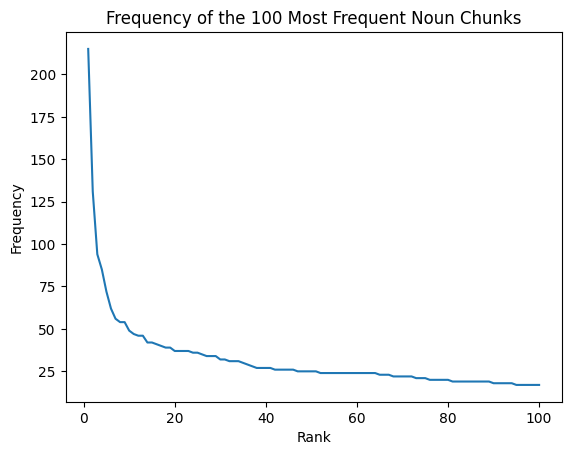

In [68]:
import matplotlib.pyplot as plt

noun_chunks_count_sorted = sorted(noun_chunks_count.items(), key=lambda x: x[1], reverse=True)
ranks = range(1, 101)
frequencies = [x[1] for x in noun_chunks_count_sorted[:100]]

plt.plot(ranks, frequencies)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Frequency of the 100 Most Frequent Noun Chunks")
plt.show()

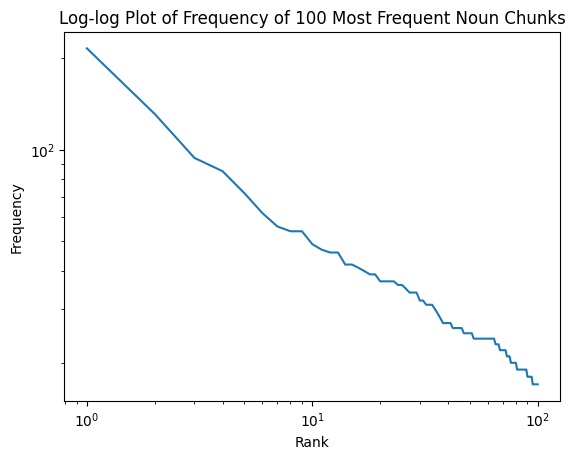

In [70]:
noun_chunks_frequency = Counter(noun_chunks_count)

x = range(1, 101)
y = [noun_chunks_frequency.most_common(100)[i-1][1] for i in x]

plt.loglog(x, y)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Log-log Plot of Frequency of 100 Most Frequent Noun Chunks")
plt.show()
